## The Percepton 
Using Python Classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.array([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array([0., 1., 0., 1.], dtype = np.float32)

`What is the dot after 0` \
`What is a floating pont number?`\
`If you don't care about precision and space you can use the 32 bit float`


In [3]:
y = np.array([0,0,0,1], dtype = int)

`The 0 with no decimal means integer`

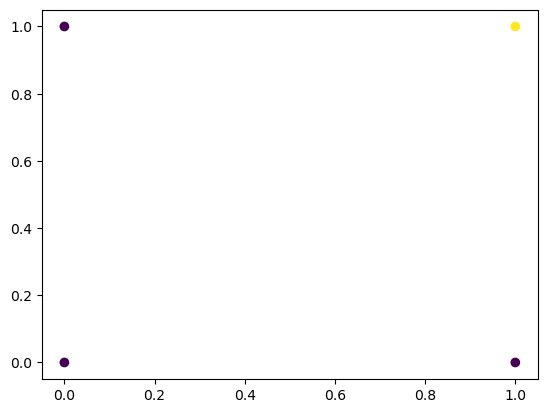

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x1, x2, c=y)

In [5]:
# Repeat the numbers from x1, x2 and y 50 times each
# For example for x1, each element of x1 will be repeated 50 times, so there will be 200 sample points at the end of it
x1 = np.repeat(x1, 50) # This is a vector/aray
x2 = np.repeat(x2, 50) # This is a vector/aray
y = np.repeat(y, 50) # This is a vector/aray

In [6]:
# Add random noise to data points


x1 = x1 + np.random.rand(x1.shape[0])*0.05
x2 = x2 + np.random.rand(x2.shape[0])*0.05

x1

array([3.17960069e-02, 9.33730184e-03, 7.35714617e-03, 2.39947814e-02,
       2.49041825e-02, 1.54578967e-02, 1.56823797e-02, 5.79864795e-03,
       4.55058904e-02, 9.29432795e-03, 1.21978461e-02, 2.89389814e-02,
       2.17642185e-02, 2.45669797e-02, 2.13373589e-03, 2.39244741e-02,
       4.01636406e-02, 2.15993246e-02, 2.44975445e-02, 3.06881563e-02,
       8.02284393e-03, 6.41781520e-03, 4.45263833e-02, 6.60841409e-03,
       1.09143460e-02, 4.17935796e-02, 1.04921334e-02, 1.34161527e-02,
       2.34622970e-02, 2.70199124e-02, 3.97371473e-02, 9.13180008e-04,
       3.58549097e-02, 2.04508410e-03, 3.52963530e-02, 2.11407995e-02,
       2.12264283e-02, 3.84783335e-02, 1.57215290e-02, 4.21295914e-02,
       1.70452318e-02, 9.19111974e-03, 8.54003548e-03, 3.00782660e-02,
       1.85962472e-02, 4.41079623e-02, 4.72695740e-02, 1.04358400e-02,
       3.73039248e-02, 3.83621635e-02, 2.16379162e-02, 3.69165356e-02,
       3.49489018e-02, 7.50779615e-03, 3.15369328e-02, 2.72495255e-02,
      

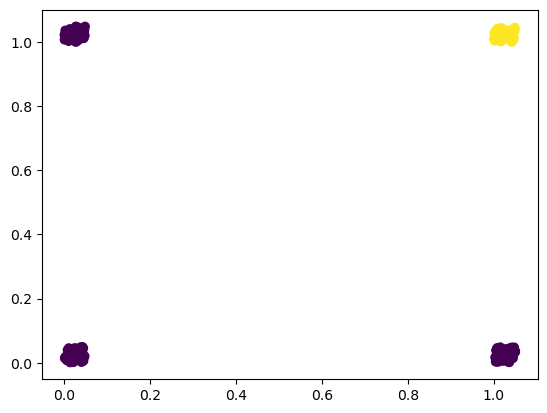

In [7]:
plt.scatter(x1, x2, c = y)

In [8]:
# Combine x1 and x2
X = np.column_stack((x1, x2))

In [9]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (200, 2)
y shape:  (200,)


In [10]:
# Diffusion
# We need to shuffle the index
# Generate indexes from 0 to 199
shuffle_idx = np.arange(y.shape[0])

In [11]:
# Random number generator with a seed
# It is not trully random, but just a pseudo-random
shuffle_rng = np.random.RandomState(42)
shuffle_rng.shuffle(shuffle_idx)

print('Shuffled indices: ', shuffle_idx)

Shuffled indices:  [ 95  15  30 158 128 115  69 170 174  45  66 182 165  78 186 177  56 152
  82  68 124  16 148  93  65  60  84  67 125 132   9  18  55  75 150 104
 135 137 164  76  79 197  38  24 122 195  29  19 143  86 114 173   5 126
 117  73 140  98 172  96 169  97  31  12  35 119  42 189  90 136  51 127
 162  41 118 113  26 139 100 111   2  77  46 187 191  85 161  36 190  61
  22 141 101  33  11 194 159   6  27 120   4  32 142 145 109 144  10  62
 112 146 166   0 198 153  70 123  64  44 163  28  40 108 155 156  25  23
 184 147  81  39 168  47  94 154  43 138   3 105  53 133 180 178 185  49
  80  34   7 110  91  83 176 181  89   8  13  59 171 131  17  72 175 134
 167 183  63  54 107  50 196  58  48  88  21  57 160 192 129  37 157 193
   1  52 149 130 151 103  99 116  87  74 121 199  20 188  71 106  14  92
 179 102]


In [12]:
X, y = X[shuffle_idx], y[shuffle_idx]
# ???? What does this syntax do

split_point = int(0.7 * X.shape[0])

X_train, X_test = X[shuffle_idx[:split_point]], X[shuffle_idx[split_point:]] 
# ??? What is this colon notation
y_train, y_test = y[shuffle_idx[:split_point]], y[shuffle_idx[split_point:]]

In [13]:
# Normalisation (zero mean, unit variance)
# When axis is 0, you are doing an operation across rows. When doing axis = 1, it is an operation across columns
# We only need the mean and variance for the training data set because is the one used by the machine to learn
mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

print('zero mean: ', mu)
print('unit variance(standard deviation): ', sigma)

X_train = (X_train - mu) /sigma
X_test = (X_test - mu) /sigma

zero mean:  [0.4900251  0.53236924]
unit variance(standard deviation):  [0.49955302 0.49871098]


In [14]:
np.zeros((3,1), dtype = float)

array([[0.],
       [0.],
       [0.]])

In [30]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype = float)
        self.bias = np.zeros((1,), dtype = float)
   
 # A foward pass is when you pass a neuron /perceptron some input and compute your output
    def forward(self,x):
        linear = np.dot(x,self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions
       #Start from the ouput go back to the input 
    def backward(self,x,y):
        predictions = self.forward(x)
        errors=y - predictions
        return errors
    
    def train(self,x,y,epochs):
        for e in range (epochs):
            for i in range(y.shape[0]):
                errors  = self.backward(x[i].reshape(1,self.num_features) ,y[i]).reshape(-1)
                self.weights += (errors*x[i]).reshape(self.num_features,1)
                self.bias= errors * 1
                
    #Evaluation
    def evaluate(self,x,y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(prediction == y)/ y.shape[0]
        return accuracy
        
                

In [31]:
ppn = Perceptron(num_features = 2)

ppn.train(X_train,y_train, epochs = 5)

In [32]:
print('Model parameters: ')
print('Weights:', ppn.weights)
print('Bias', ppn.bias)

Model parameters: 
Weights: [[0.88756605]
 [1.83900746]]
Bias [0]
